<hr style="border-top: 2px solid black;">

__<font size=6.5><font color=brown>Low back pain among medical students in Bangladesh__
    <hr style="border-top: 2px solid black;">


<img src= "https://github.com/royohana31/nn-project-/blob/main/Back_pain_image.png?raw=true" width="300"/>
<hr style="border-top: 2px solid black;">

__<font size=4><font color=brown>Group number:43__
    <div>
        
__<font size=4><font color=brown>Presentors:<div> Roee Ohana<div>
      <div>Ohad Nuiman
      <div>Zohar Levy__
<hr style="border-top: 2px solid black;">


<font size=4><font color=brown>__Relevent libraries__


In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<hr style="border-top: 2px solid black;">


<font size=5><font color=brown>__Reding the data and clearing__


In [307]:
url="https://raw.githubusercontent.com/royohana31/nn-project-/main/Raw%20dataset%20(2).csv"
spine_df=pd.read_csv(url,on_bad_lines='skip')


In [308]:
spine_df=spine_df.drop(0)

In [309]:
spine_df["Educational_level"].replace({"Final year":"last_year",'4th year':"last_year",'Medical interns':"interns"},inplace=True)

In [310]:
spine_df["Sitting_time"].replace({'< 6 hours':"less_than_6",'? 6 hours':"above_6"},inplace=True)

In [311]:
spine_df.rename(columns={"Height (m)":"Height"},inplace=True)

In [312]:
spine_df.drop(columns=["Age_group","BMI",])

,Educational_level,Gender,Age,Height,Weight (kg),BMI_Range,Currently_LBP,LBP_6months,LBP_12months,LBP_first_time,...,Treatments,Do_exercise,Physical_activity_Frequency,Smoking_habit,Sitting_time,Chair_type,Adjustable_back,Adjustable_sitting,Most_activity,Rest_time
1,interns,Male,24.0,1.80,90.0,2,No,Yes,Yes,Medical,...,No treatment,5 - 7 times a week,High,Smoker,less_than_6,No back support,No,No,Sitting,Yes
2,interns,Male,24.0,2.00,74.0,1,Yes,Yes,Yes,Medical,...,Opioid painkillers,2 - 4 times a week,Moderate,Never smoked,above_6,No back support,No,Yes,Bending,Yes
3,interns,Female,23.0,1.60,54.0,1,Yes,Yes,Yes,Medical,...,Opioid+Exercise,2 - 4 times a week,Moderate,Never smoked,less_than_6,Have back support,No,No,Sitting,Yes
4,interns,Male,24.0,1.80,78.0,1,Yes,Yes,Yes,Medical,...,No treatment,Once a week,Moderate,Ex-smoker,less_than_6,Have back support,No,Yes,No task for long time,Yes
5,interns,Female,24.0,1.60,50.0,1,Yes,Yes,Yes,Internship,...,Opioid painkillers,Rarely,Low,Never smoked,less_than_6,No back support,No,No,Standing or walking,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1st year,Male,20.0,1.63,65.0,1,No,No,No,NaN,...,NaN,>7 times a week,High,Never smoked,less_than_6,Have back support,Yes,Yes,No task for long time,Yes
204,2nd year,Female,22.0,1.56,57.0,1,No,No,No,Medical,...,Opioid painkillers,5 - 7 times a week,High,Never smoked,less_than_6,Have back support,Yes,No,No task for long time,Yes
205,3rd year,Female,21.0,1.60,65.0,2,No,No,No,NaN,...,NaN,5 - 7 times a week,High,Never smoked,less_than_6,Have back support,Yes,Yes,No task for long time,Yes
206,2nd year,Male,20.0,1.60,62.0,1,No,Yes,Yes,Medical,...,No treatment,Once a week,Moderate,Smoker,above_6,No back support,No,No,Sitting,No


In [313]:
spine_df['LBP_first_time'].fillna("unreported", inplace=True)
spine_df['Duration_in_12_months'].fillna("unreported", inplace=True)
spine_df['LBP_episodes'].fillna("unreported", inplace=True)
spine_df['Causes'].fillna("unreported", inplace=True)
spine_df['Aggravating_factors'].fillna("unreported", inplace=True)
spine_df['Leg_pain'].fillna("unreported", inplace=True)
spine_df['Treatments'].fillna("unreported", inplace=True)
spine_df.isnull().sum()

Educational_level              0
Gender                         0
Age                            0
Age_group                      0
Height                         0
Weight (kg)                    0
BMI                            0
BMI_Range                      0
Currently_LBP                  0
LBP_6months                    0
LBP_12months                   0
LBP_first_time                 0
Duration_in_12_months          0
LBP_episodes                   0
Causes                         0
Aggravating_factors            0
Leg_pain                       0
Treatments                     0
Do_exercise                    0
Physical_activity_Frequency    0
Smoking_habit                  0
Sitting_time                   0
Chair_type                     0
Adjustable_back                0
Adjustable_sitting             0
Most_activity                  0
Rest_time                      0
dtype: int64

<hr style="border-top: 2px solid black;">


<font size=5><font color=brown>__Correlation preperation__


In [314]:
dummies=pd.get_dummies(spine_df,columns=["LBP_12months",'BMI_Range','Educational_level','Physical_activity_Frequency','Gender','Rest_time','Most_activity','Leg_pain','Currently_LBP','Duration_in_12_months','Chair_type','Adjustable_sitting','LBP_episodes','Sitting_time','Smoking_habit','Do_exercise','Aggravating_factors','LBP_first_time'])

<hr style="border-top: 2px solid black;">


<font size=6 color = darkblue>__conclusion 1: The connection between genetics and biology on LBP among the students__

<img src= "https://github.com/royohana31/nn-project-/blob/main/sangharsh-lohakare-Iy7QyzOs1bo-unsplash.jpg?raw=true" width="300"/>

<hr style="border-top: 2px solid black;">


<font size=4 color = darkblue>__conclusion 1: we will check the connection between genetics and biology on the possibility that the students will suffer from LBP__

<hr style="border-top: 2px solid black;">


<Axes: title={'center': 'Gender and LBP CORR'}>

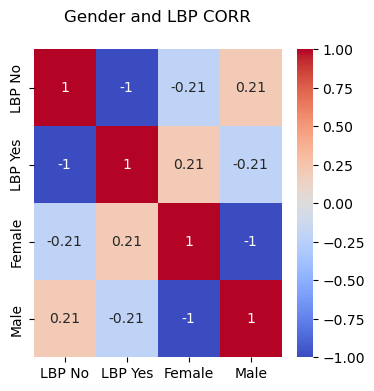

In [315]:
selected=dummies[['LBP_12months_No','LBP_12months_Yes', 'Gender_Female', 'Gender_Male']]
corr_matrix=selected.corr(method="kendall")
plt.figure(figsize=(4,4))
plt.title('Gender and LBP CORR', pad=20)  # Adding the title with padding
selected.columns = ['LBP No', 'LBP Yes', 'Female', 'Male']
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, xticklabels=selected.columns, yticklabels=selected.columns)



<hr style="border-top: 2px solid black;">


<font size=3>we can understand there is a connenction about being a female and have LBP we will check it

<hr style="border-top: 2px solid black;">


In [316]:
spine_df['LBP_12monthsbool'] = spine_df['LBP_12months'].map({'Yes': 1, 'No':0 })
filtered1=spine_df.groupby("LBP_12months")["LBP_12monthsbool"].mean().reset_index()




C:\Users\Admin\AppData\Local\Temp\ipykernel_2980\991799682.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=spine_df, x="Gender", y="LBP_12monthsbool",ax=ax[2],ci=None)


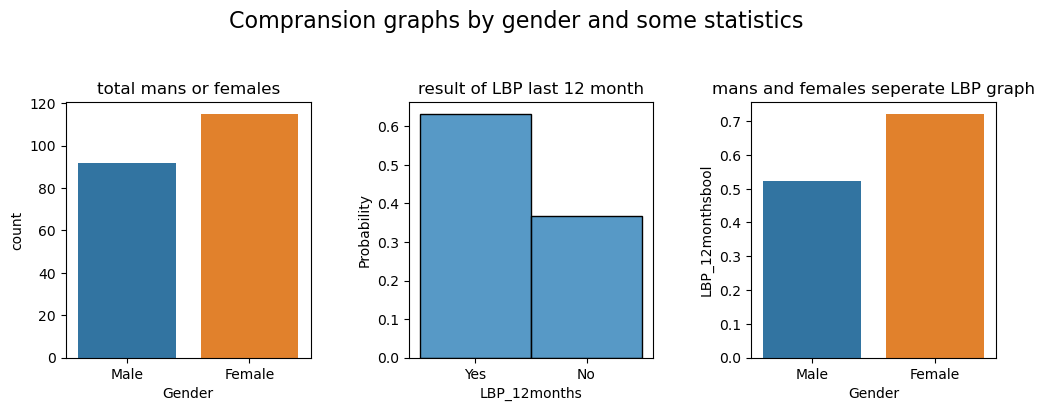

In [317]:
fig, ax = plt.subplots(1,3,figsize=(12, 4))
sns.histplot(data=spine_df,x='LBP_12months',ax=ax[1],stat="probability")
ax[1].set_title("result of LBP last 12 month")
sns.countplot(data=spine_df,x="Gender",ax=ax[0])
ax[0].set_title("total mans or females")
counts = spine_df.groupby("Gender")['LBP_12months'].value_counts().reset_index()
sns.barplot(data=spine_df, x="Gender", y="LBP_12monthsbool",ax=ax[2],ci=None)
ax[2].set_title("mans and females seperate LBP graph")
fig.suptitle('Compransion graphs by gender and some statistics',size=16)
plt.subplots_adjust()
plt.subplots_adjust(top=0.75, wspace=0.4)





<hr style="border-top: 2px solid black;">


<font size=3 color=green>__sub conclusion: more females suffer relatively from LBP among the students.__

<hr style="border-top: 2px solid black;">


<font size=5>__height and spine pain__
    


<img src= "https://github.com/royohana31/nn-project-/blob/main/1415872640418_wps_8_Chandra_Bahadur_Dandi_the_g.png?raw=true" width="250"/>

<Axes: title={'center': 'Height and LBP CORR'}>

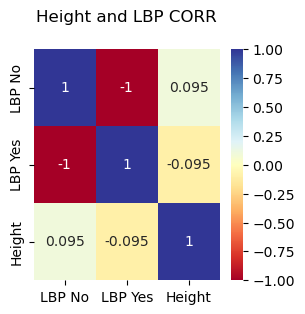

In [318]:
selected=dummies[['LBP_12months_No','LBP_12months_Yes','Height']]
corr_matrix=selected.corr(method="kendall")
plt.figure(figsize=(3,3))
plt.title('Height and LBP CORR', pad=20)  # Adding the title with padding
selected.columns = ['LBP No', 'LBP Yes', 'Height']
sns.heatmap(corr_matrix, cmap='RdYlBu', center=0, annot=True, xticklabels=selected.columns, yticklabels=selected.columns)



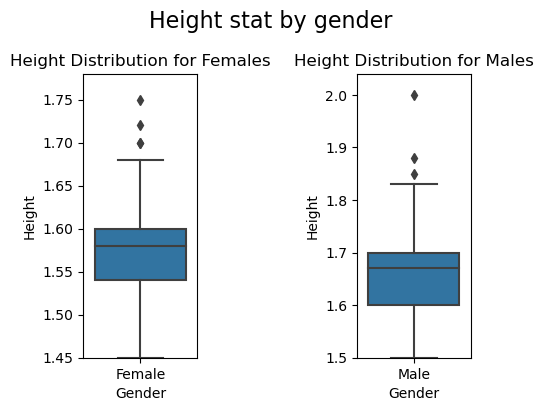

In [319]:
females=spine_df[spine_df["Gender"]=="Female"]
males=spine_df[spine_df["Gender"]=="Male"]
fig, ax = plt.subplots(1,2,figsize=(5, 4))
sns.boxplot(data=males,x='Gender',y="Height",ax=ax[1])
sns.boxplot(data=females,x='Gender',y="Height",ax=ax[0])
ax[0].set_title('Height Distribution for Females')
ax[1].set_title('Height Distribution for Males')
plt.subplots_adjust(wspace=1)
fig.suptitle('Height stat by gender',size=16)
plt.subplots_adjust(top=0.82)
ax[0].set_ylim(1.45, None)
ax[1].set_ylim(1.50, None)
plt.subplots_adjust(wspace=1.4)  





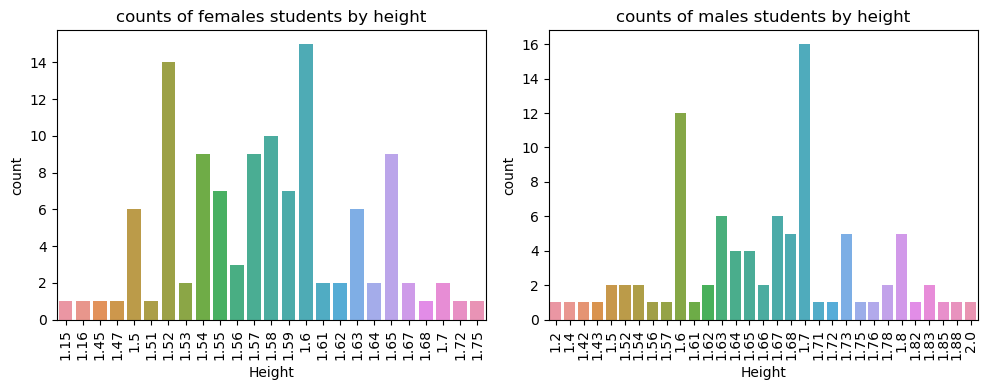

In [320]:
filteredfemales = females[females.groupby('Height')['Height'].transform('count') >= 3]
filteredmales = males[males.groupby('Height')['Height'].transform('count') >= 3]
fig, ax = plt.subplots(1,2,figsize=(10, 4))
sns.countplot(data=females,x='Height',ax=ax[0])
sns.countplot(data=males,x='Height',ax=ax[1])
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_title("counts of females students by height")
ax[1].set_title("counts of males students by height")
plt.subplots_adjust(wspace=0.7, hspace=0.7)  
plt.tight_layout()

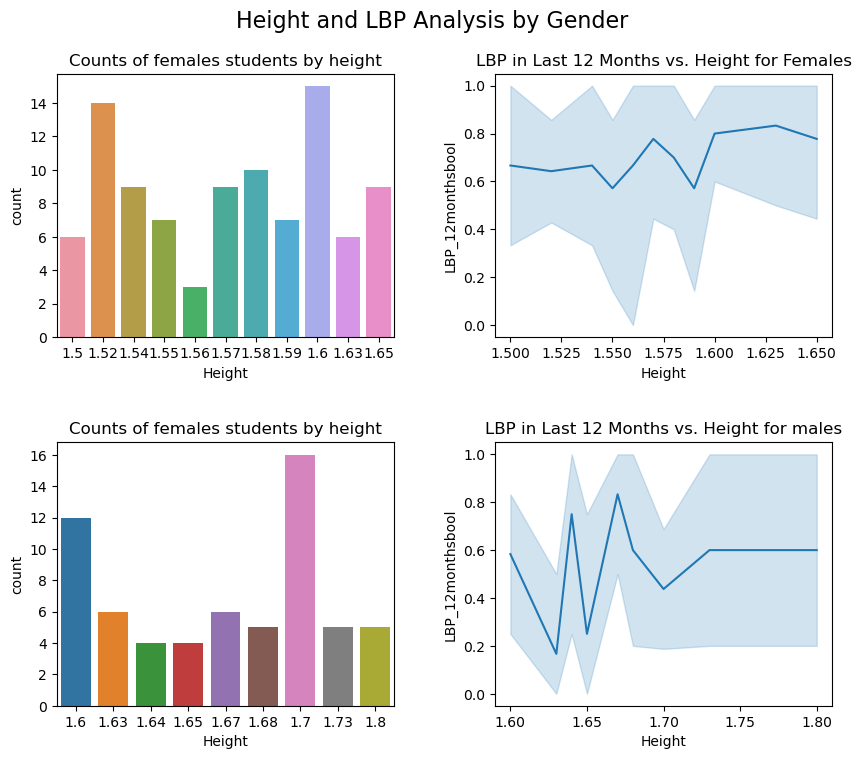

In [321]:
fig, ax = plt.subplots(2,2,figsize=(10, 8))
sns.countplot(data=filteredfemales,x='Height',ax=ax[0,0])
sns.lineplot(data=filteredfemales, x="Height", y='LBP_12monthsbool', ax=ax[0, 1])
sns.countplot(data=filteredmales,x='Height',ax=ax[1,0])
sns.lineplot(data=filteredmales, x="Height", y='LBP_12monthsbool', ax=ax[1, 1])
ax[0, 0].set_title('Counts of females students by height')
ax[0, 1].set_title('LBP in Last 12 Months vs. Height for Females')
ax[1, 0].set_title('Counts of females students by height')
ax[1, 1].set_title('LBP in Last 12 Months vs. Height for males')
fig.suptitle('Height and LBP Analysis by Gender', size=16)
plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.4)




<font size=4,font color=green>__The distrubution isnt linear in both genders__


<hr style="border-top: 2px solid black;">


<font size=4,font color=green>__sub-conclusion:Height have no effect on the probability to have LBP__
    

<hr style="border-top: 2px solid black;">


<font size=5>__BMI "range" "and" spine pain__  

<img src= "https://github.com/royohana31/nn-project-/blob/8af8a393b59ededd35525654d14246a7b95da6e5/download.jpg?raw=True"
width="600"/>

<Axes: title={'center': 'Height and LBP CORR'}>

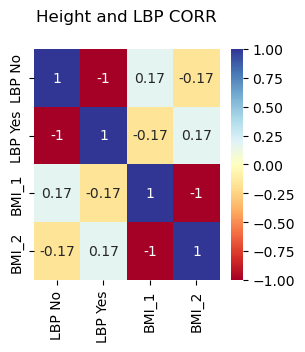

In [322]:
selected=dummies[['LBP_12months_No','LBP_12months_Yes','BMI_Range_1', 'BMI_Range_2']]
corr_matrix=selected.corr(method="kendall")
plt.figure(figsize=(3,3))
plt.title('Height and LBP CORR', pad=20) 
selected.columns = ['LBP No', 'LBP Yes', 'BMI_1',"BMI_2"]
sns.heatmap(corr_matrix, cmap='RdYlBu', center=0, annot=True, xticklabels=selected.columns, yticklabels=selected.columns)



C:\Users\Admin\AppData\Local\Temp\ipykernel_2980\3386066031.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=spine_df,x='BMI_Range',y="LBP_12monthsbool",ci=None)


Text(0.5, 1.0, 'distribution of LBP by BMI group')

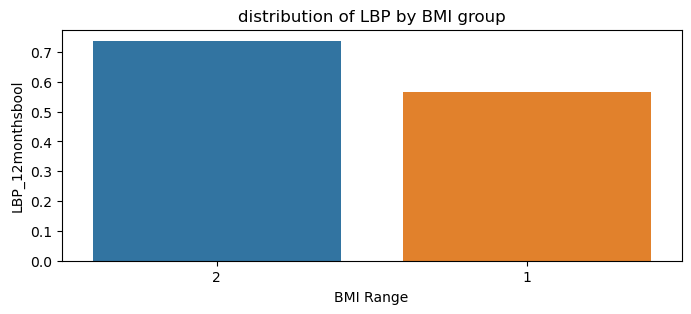

In [323]:
plt.figure(figsize=(8,3))
sns.barplot(data=spine_df,x='BMI_Range',y="LBP_12monthsbool",ci=None)
plt.xlabel('BMI Range')
plt.title('distribution of LBP by BMI group')


<font size=4,font color=green>__we can see that group 2 are more likely to suffer from LBP__


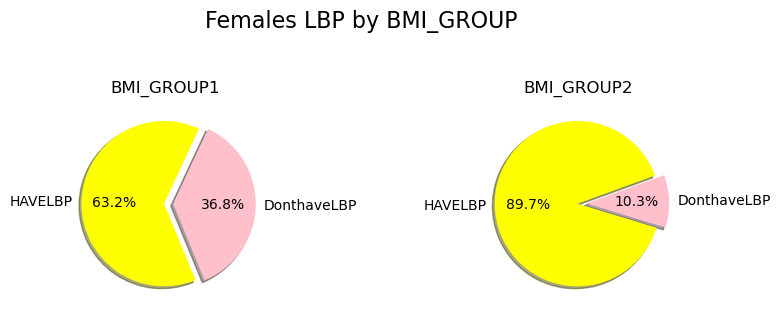

In [324]:

FBMI1=spine_df[(spine_df['Gender']=="Female")&(spine_df['BMI_Range']=='1')]
size1=FBMI1['LBP_12months'].value_counts()
FBMI2=spine_df[(spine_df['Gender']=="Female")&(spine_df['BMI_Range']=='2')]
size2=FBMI2['LBP_12months'].value_counts()
fig, ax = plt.subplots(1,2,figsize=(8, 4))
ax[0].pie(size1, labels=["HAVELBP",'DonthaveLBP'],autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1),colors = ['yellow', 'pink'],startangle=65)
ax[0].set_title("BMI_GROUP1")
ax[1].pie(size2, labels=["HAVELBP",'DonthaveLBP'], autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1),colors = ['yellow', 'pink'],startangle=20)
ax[1].set_title("BMI_GROUP2")
fig.suptitle('Females LBP by BMI_GROUP', fontsize=16)
plt.subplots_adjust(wspace=1)

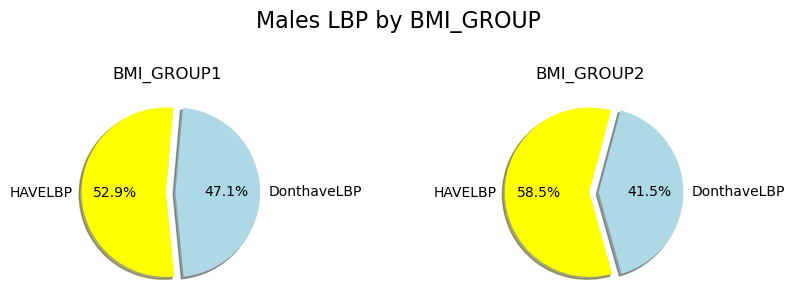

In [325]:
MBMI1=spine_df[(spine_df['Gender']=="Male")&(spine_df['BMI_Range']=='1')]
size3=MBMI1['LBP_12months'].value_counts()
MBMI2=spine_df[(spine_df['Gender']=="Male")&(spine_df['BMI_Range']=='2')]
size4=MBMI2['LBP_12months'].value_counts()
fig, ax = plt.subplots(1,2,figsize=(8, 4))
fig.suptitle('Males LBP by BMI_GROUP', fontsize=16,y=0.9)
ax[0].pie(size3, labels=["HAVELBP",'DonthaveLBP'], autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1),colors = ['yellow', 'lightblue'],startangle=85)
ax[1].pie(size4, labels=["HAVELBP",'DonthaveLBP'], autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1),colors = ['yellow', 'lightblue'],startangle=75)
ax[0].set_title("BMI_GROUP1")
ax[1].set_title("BMI_GROUP2")
plt.tight_layout()
plt.subplots_adjust(wspace=1)



<font size=4 color = green >sub-conclusion: The"BMI_Range" has a big impact on Females students and normal impact among the Males students

<hr style="border-top: 2px solid black;">


<font size=6,font color=darkblue> main conclusion1 :Females are more likely to suffer from LBP among the students,height has no effect on LBP but BMI group has enormous impact on the probability to suffer from LBP espcially among females

<hr style="border-top: 2px solid black;">


 <font size=6 color = darkblue>__Conclusion 2: Does lifestyle effect the students LBP ?__

<img src= "https://github.com/royohana31/nn-project-/blob/main/%D7%94%D7%95%D7%A8%D7%93%D7%94.jpg?raw=true" width="400"/>

we will check if the life-style of the student effects his chances to suffer from LBP

<hr style="border-top: 2px solid black;">


<font size=5>__"THE perfect chair scala"__  

<img src="https://github.com/royohana31/nn-project-/blob/4522a8a8d6d98f8777c6592ef89049929aaac25f/2.jpg?raw=True"
 width="400"/>

<hr style="border-top: 2px solid black;">


In [326]:
spine_df["perfect_chair"] = (
    (spine_df["Chair_type"] == "Have back support") &
    (spine_df["Adjustable_back"] == "Yes") &
    (spine_df["Adjustable_sitting"] == "Yes")
).apply(lambda x: "yes" if x else "no")

spine_df["semi_perfect"] = (((spine_df["Chair_type"] == "Have back support") & 
     (spine_df["Adjustable_back"] == "Yes") & 
     (spine_df["Adjustable_sitting"] == "No")) |
    ((spine_df["Chair_type"] == "No back support") & 
     (spine_df["Adjustable_back"] == "Yes") & 
     (spine_df["Adjustable_sitting"] == "Yes")) |
    ((spine_df["Chair_type"] == "Have back support") & 
     (spine_df["Adjustable_back"] == "No") & 
     (spine_df["Adjustable_sitting"] == "Yes"))
).apply(lambda x: "yes" if x else "no")
spine_df["semi_perfect"].value_counts()
spine_df.groupby('semi_perfect')["LBP_12months"].value_counts()



semi_perfect  LBP_12months
no            Yes             115
              No               64
yes           Yes              16
              No               12
Name: count, dtype: int64

<Axes: >

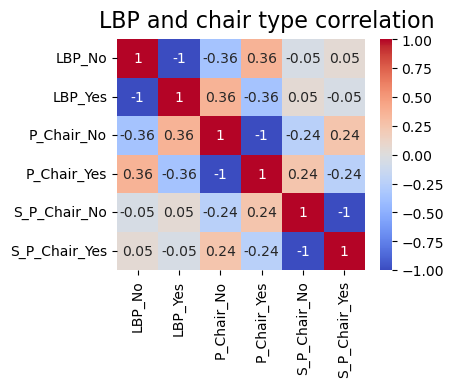

In [327]:
newdummi=pd.get_dummies(spine_df,columns=["perfect_chair",'semi_perfect',"LBP_12months"])
newdummi.columns
interest=['LBP_12months_No', 'LBP_12months_Yes','perfect_chair_no',
       'perfect_chair_yes', 'semi_perfect_no', 'semi_perfect_yes',]
short_labels = ['LBP_No', 'LBP_Yes', 'P_Chair_No', 'P_Chair_Yes', 'S_P_Chair_No', 'S_P_Chair_Yes']
matrix=newdummi[interest].corr()
fig, ax = plt.subplots(figsize=(4, 3))
fig.suptitle('LBP and chair type correlation', fontsize=16)
sns.heatmap(matrix, cmap='coolwarm', center=0, annot=True, xticklabels=short_labels, yticklabels=short_labels)


we will check to see if there is a connection...

<hr style="border-top: 2px solid black;">


 <font size=3 color = black>__the Semi perfect chair__

<hr style="border-top: 2px solid black;">


C:\Users\Admin\AppData\Local\Temp\ipykernel_2980\1830195324.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=spine_df,x='semi_perfect',y="LBP_12monthsbool",ci=None)


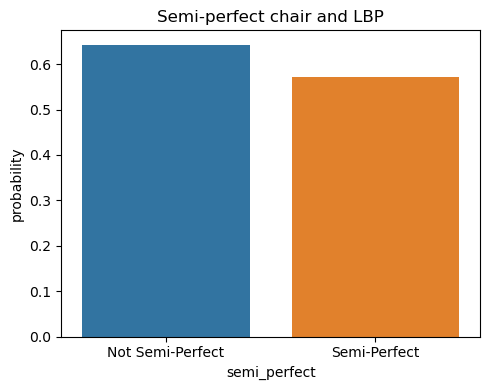

In [328]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(data=spine_df,x='semi_perfect',y="LBP_12monthsbool",ci=None)
ax.set_xticklabels(['Not Semi-Perfect', 'Semi-Perfect'])
ax.set_ylabel("probability")
ax.set_title("Semi-perfect chair and LBP")


plt.tight_layout()


<hr style="border-top: 2px solid black;">


 <font size=3 color = black>__The "perfect chair"__

<hr style="border-top: 2px solid black;">


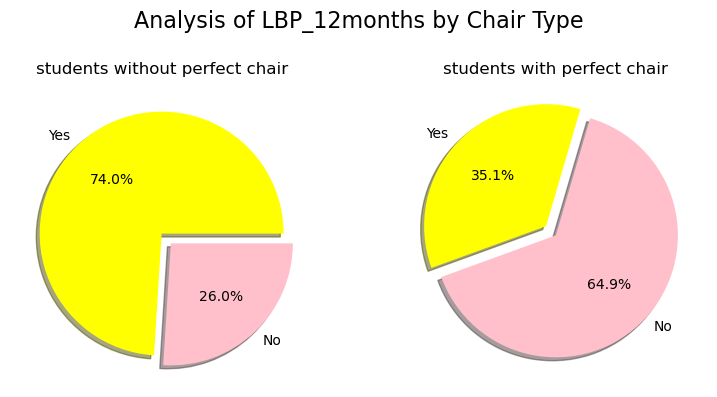

In [329]:
spine_df["perfect_chair"] = (
    (spine_df["Chair_type"] == "Have back support") &
    (spine_df["Adjustable_back"] == "Yes") &
    (spine_df["Adjustable_sitting"] == "Yes")
).apply(lambda x: "yes" if x else "no")

counts1=spine_df[spine_df["perfect_chair"]=='yes'].groupby("perfect_chair")["LBP_12months"].value_counts().reset_index()
counts2=spine_df[spine_df["perfect_chair"]=='no'].groupby("perfect_chair")["LBP_12months"].value_counts().reset_index()
counts1
counts1
fig, ax = plt.subplots(1,2,figsize=(8, 4))
fig.suptitle('Analysis of LBP_12months by Chair Type', fontsize=16)
ax[1].pie(counts1["count"], labels=counts1["LBP_12months"].unique(), autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1),colors = ['pink', 'yellow'],startangle=200 )
ax[1].set_title("students with perfect chair")
ax[0].pie(counts2["count"], labels=counts2["LBP_12months"].unique(), autopct='%1.1f%%',shadow = True, explode = (0.01, 0.1),colors = ['yellow', 'pink'])
ax[0].set_title("students without perfect chair")
plt.tight_layout()
plt.subplots_adjust(top=0.8)  





C:\Users\Admin\AppData\Local\Temp\ipykernel_2980\394839980.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=spine_df,x='perfect_chair',y='LBP_12monthsbool',hue='semi_perfect',ax=ax[1],ci=None)


Text(0.5, 0.98, 'Comparison of LBP by Chair Type')

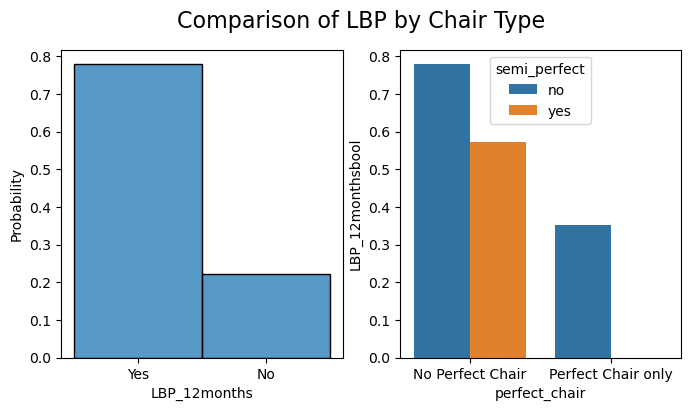

In [330]:
filtered=spine_df[(spine_df['semi_perfect']=="no")&(spine_df['perfect_chair']=='no')]
filtered2=spine_df[(spine_df['semi_perfect']=="yes")&(spine_df['perfect_chair']=='no')]
filtered3=spine_df[(spine_df['semi_perfect']=='no')&(spine_df['perfect_chair']=='yes')]
filtered3.shape
fig, ax = plt.subplots(1,2,figsize=(8, 4))
sns.histplot(data=filtered,x='LBP_12months',stat="probability",ax=ax[0])
sns.barplot(data=spine_df,x='perfect_chair',y='LBP_12monthsbool',hue='semi_perfect',ax=ax[1],ci=None)
ax[1].set_xticklabels(['No Perfect Chair', 'Perfect Chair only'])
fig.suptitle('Comparison of LBP by Chair Type', fontsize=16)


<hr style="border-top: 2px solid black;">


<font size=3 color = green>__sub-conclusion: we can understand that comfort chair decrease the chances to suffer among the students!__


<hr style="border-top: 2px solid black;">


<font size=5>__"THE active-level scala"__  

<hr style="border-top: 2px solid black;">


In [331]:
conditions = [
    (spine_df["Do_exercise"] == '>7 times a week') & (spine_df['Physical_activity_Frequency'] == "High"),
    (spine_df["Do_exercise"] == '5 - 7 times a week') & (spine_df['Physical_activity_Frequency'] == "High"),
    (spine_df["Do_exercise"] == '2 - 4 times a week') & (spine_df['Physical_activity_Frequency'] == "Moderate"),
    (spine_df["Do_exercise"] == 'Never') & (spine_df['Physical_activity_Frequency'] == "Low"),
    (spine_df["Do_exercise"] == 'Once a week') & (spine_df['Physical_activity_Frequency'] == "Moderate"),
    ((spine_df["Do_exercise"] == 'Never')|(spine_df["Do_exercise"] == 'Rarely')) & (spine_df['Physical_activity_Frequency'] == "Low")
]
choices=['extremely_active','very_active','active','inactive','moderately_active','inactive']
spine_df["activness_level"] = np.select(conditions, choices,default="Unknown")



Text(0.5, 1.05, 'LBP and Active Level Correlation')

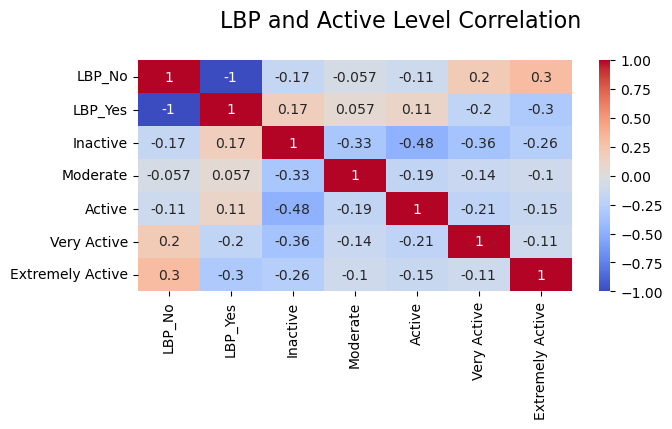

In [332]:
newdummi=pd.get_dummies(spine_df,columns=["activness_level","LBP_12months"])
newdummi.columns
interest=['LBP_12months_No', 'LBP_12months_Yes','activness_level_inactive',
       'activness_level_moderately_active', 'activness_level_active',
       'activness_level_very_active','activness_level_extremely_active']
short_labels = ['LBP_No', 'LBP_Yes', 'Inactive', 'Moderate', 'Active', 'Very Active', 'Extremely Active']
matrix=newdummi[interest].corr()
fig, ax = plt.subplots(figsize=(7, 3))
sns.heatmap(matrix, cmap='coolwarm', center=0, annot=True, xticklabels=short_labels, yticklabels=short_labels)
fig.suptitle('LBP and Active Level Correlation', fontsize=16, y=1.05)  


we can see strong connection between being active and dont suffer from pain,we will check it either 

<Axes: xlabel='activness_level', ylabel='count'>

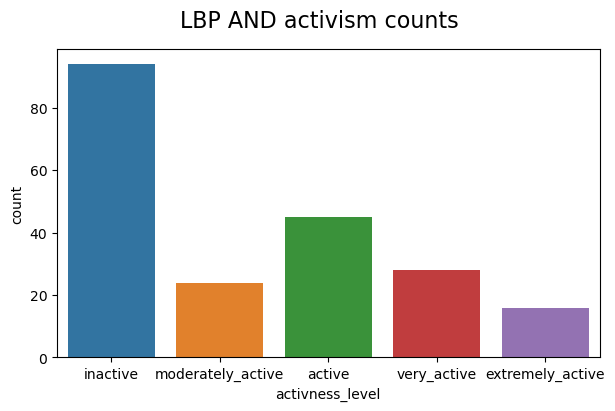

In [333]:
order1 = ['inactive', 'moderately_active', 'active', 'very_active', 'extremely_active']
fig, ax = plt.subplots(figsize=(7, 4))
fig.suptitle('LBP AND activism counts', fontsize=16)
sns.countplot(data=spine_df,x='activness_level',order=order1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2980\2325235691.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=spine_df, x='activness_level', y='LBP_12monthsbool',ci=None)


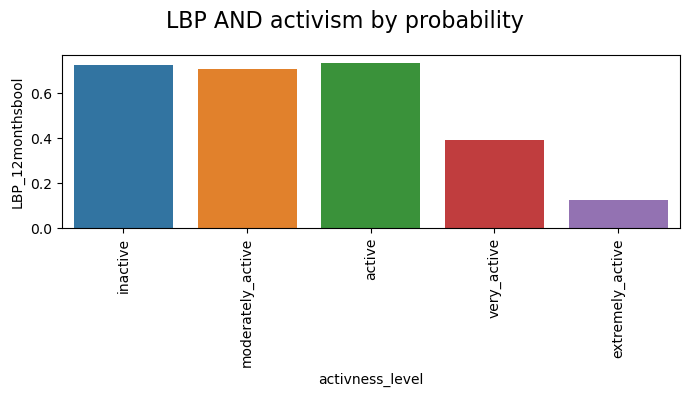

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [334]:
spine_df['activness_level']
order1=['inactive','moderately_active','active','very_active','extremely_active']
spine_df['activness_level'].value_counts()
spine_df['activness_level'] = pd.Categorical(spine_df['activness_level'], categories=order1, ordered=True)
fig, ax = plt.subplots(figsize=(7, 4))
fig.suptitle('LBP AND activism by probability', fontsize=16)
sns.barplot(data=spine_df, x='activness_level', y='LBP_12monthsbool',ci=None)
plt.xticks( rotation=90)  
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 5))



<hr style="border-top: 2px solid black;">


<font size=3, color=green>__sub-conclusion:from the heatmap and the plot we understand that students who are more above active apperantly decrease the chances to suffer from LBP__

<hr style="border-top: 2px solid black;">


<font size=5>__Smoking and LBP__

<img src= "https://github.com/royohana31/nn-project-/blob/main/18_lm.jpg?raw=true" width="400"/>

<hr style="border-top: 2px solid black;">


Text(0.5, 0.98, 'LBP and smoking connection ')

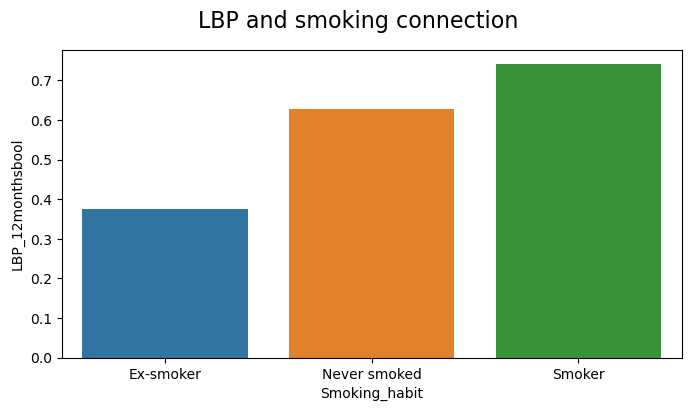

In [335]:
fig, ax = plt.subplots(figsize=(8, 4))
smoking_lbp = spine_df.groupby('Smoking_habit')['LBP_12monthsbool'].mean().reset_index()
sns.barplot(data=smoking_lbp, x='Smoking_habit', y='LBP_12monthsbool', ax=ax)
fig.suptitle('LBP and smoking connection ' , fontsize=16)



<Axes: xlabel='Smoking_habit', ylabel='count'>

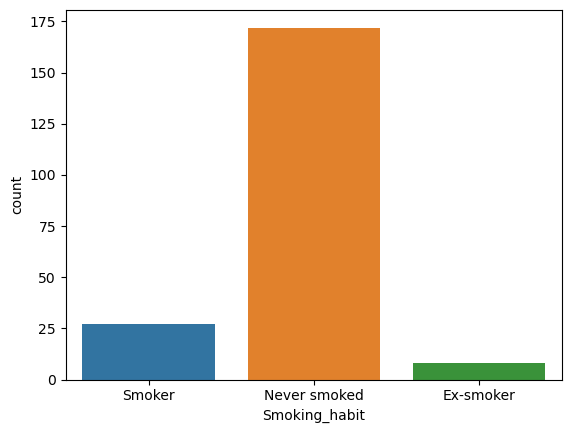

In [336]:
sns.countplot(data=spine_df,x='Smoking_habit')

<hr style="border-top: 2px solid black;">


<font size=3 color = green> __sub conclusion: we saw that the percenteges of smokers are higher than the other group but,because the unsmoker group is much bigger we cannot assume that smoking increase chances for LBP among students__

<hr style="border-top: 2px solid black;">


<font size=5>__Variety of students Treatments and the effection on LBP__

C:\Users\Admin\AppData\Local\Temp\ipykernel_2980\29053657.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered,x='Treatments',y='LBP_12monthsbool',ci=None)


Text(0.5, 1, 'Percentage of LBP in the Last 12 Months by Treatment')

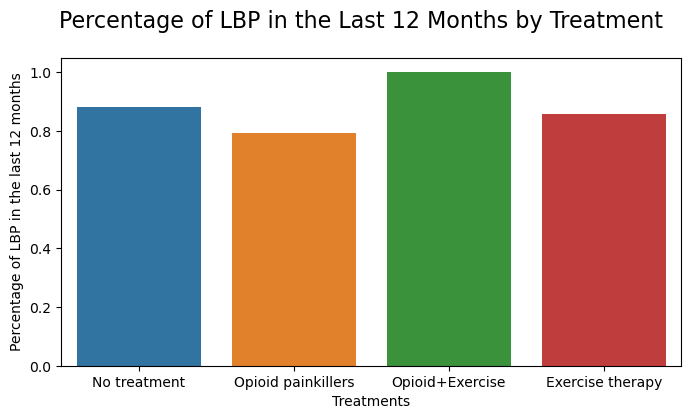

In [337]:
filtered = spine_df[~spine_df['Treatments'].isin(["unreported", 'Opioid+injection', 'Steroid injections'])]
filtered.groupby('Treatments')['LBP_12monthsbool'].mean().reset_index()
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=filtered,x='Treatments',y='LBP_12monthsbool',ci=None)
ax.set_ylabel('Percentage of LBP in the last 12 months')
fig.suptitle('Percentage of LBP in the Last 12 Months by Treatment', fontsize=16, y=1)




<font size=4>__how does it make sense that all group are with high percentages of LBP?__

C:\Users\Admin\AppData\Local\Temp\ipykernel_2980\1065097491.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered,x='Treatments',y='LBP_12monthsbool',ci=None,ax=ax[1])


Text(0.5, 1, 'LBP and Treatments Analysis')

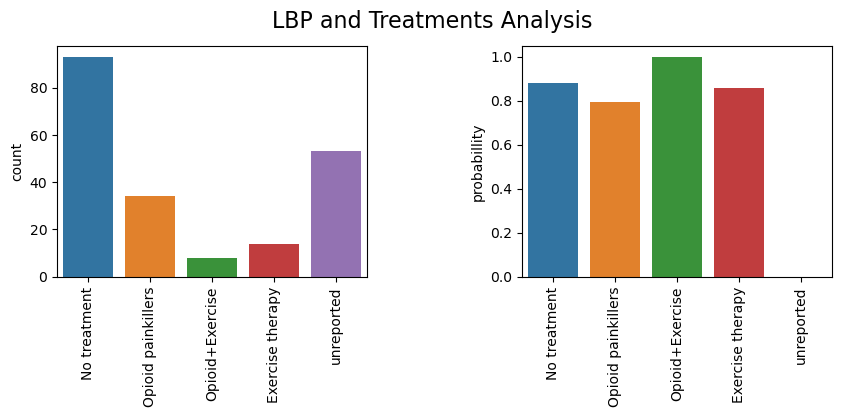

In [338]:
filtered = spine_df[~spine_df['Treatments'].isin(['Opioid+injection', 'Steroid injections'])]
filtered.groupby('Treatments')['LBP_12monthsbool'].mean().reset_index()
fig, ax = plt.subplots(1,2,figsize=(10, 3))
sns.barplot(data=filtered,x='Treatments',y='LBP_12monthsbool',ci=None,ax=ax[1])
ax[0].set_ylabel('Percentage of LBP in the last 12 months')
sns.countplot(data=filtered,x='Treatments',ax=ax[0])
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
plt.subplots_adjust(wspace=0.5)
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[1].set_ylabel('probabillity')
fig.suptitle('LBP and Treatments Analysis', fontsize=16,y=1)




<hr style="border-top: 2px solid black;">


<font size=3 color = green> __sub conclusion: apperantly,the option of the students which not suffer from LBP wasnt clear,they didnt know if to choose "Unreported" or "No-treatment",moreover the treatment wasnt affetive among the students__

<hr style="border-top: 2px solid black;">


<font size=5>__does there is a reason that "treatments" or "no treatments" students are suffer relatively highly from LBP?__

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


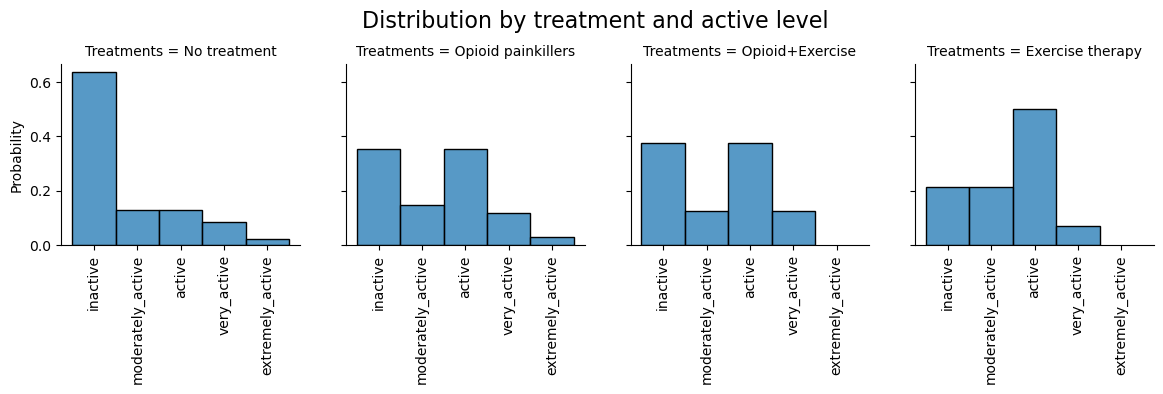

In [339]:
filtered = spine_df[~spine_df['Treatments'].isin( ['unreported','Opioid+injection', 'Steroid injections'])]
g = sns.FacetGrid(filtered, col='Treatments')
g.map_dataframe(sns.histplot, x='activness_level', multiple="stack", stat='probability')
g.fig.suptitle('Distribution by treatment and active level', fontsize=16)
plt.subplots_adjust(top=0.8)  
g.set_axis_labels("")
g.set_xticklabels(rotation=90)

<hr style="border-top: 2px solid black;">


<font size=3 color = green> __sub-conclusion:itis possibole that the treatments arent affective but also most of the students arent actives,about the notreatment group they are just lazy__

<font size=3 color = green>we will continue to check it:)

<hr style="border-top: 2px solid black;">


<font size=4>__does seating effect LBP__?

<Axes: >

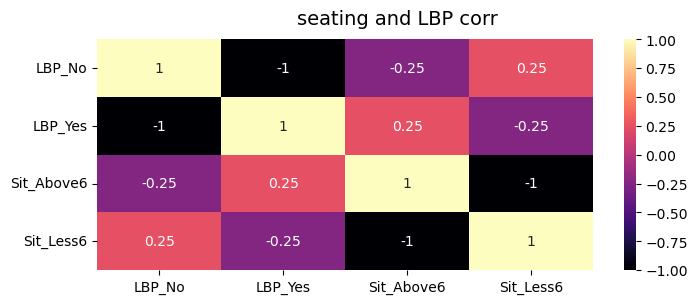

In [340]:
newdummi2=pd.get_dummies(spine_df,columns=['Sitting_time',"LBP_12months"])
newdummi2.columns
interest2=['LBP_12months_No','LBP_12months_Yes','Sitting_time_above_6','Sitting_time_less_than_6']
matrix2=newdummi2[interest2].corr()
fig, ax = plt.subplots(figsize=(8, 3))
fig.suptitle('seating and LBP corr', fontsize=14)
short_labels = ['LBP_No', 'LBP_Yes', 'Sit_Above6', 'Sit_Less6']

sns.heatmap(matrix2, cmap='magma', center=0, annot=True, xticklabels=short_labels, yticklabels=short_labels)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2980\2032585621.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=spine_df,x='Sitting_time',y='LBP_12monthsbool',ci=None)


Text(0.5, 1.0, 'distributtion of siiting time and LBP')

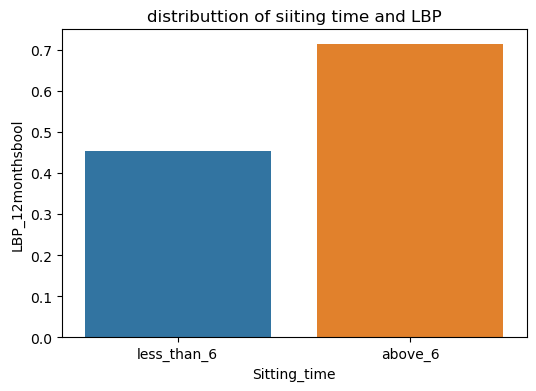

In [341]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=spine_df,x='Sitting_time',y='LBP_12monthsbool',ci=None)
ax.set_title("distributtion of siiting time and LBP")

<hr style="border-top: 2px solid black;">


<font size=3 color=green>__Sub-conclusion-we can see direct connection between seating time and LBP__

<hr style="border-top: 2px solid black;">


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


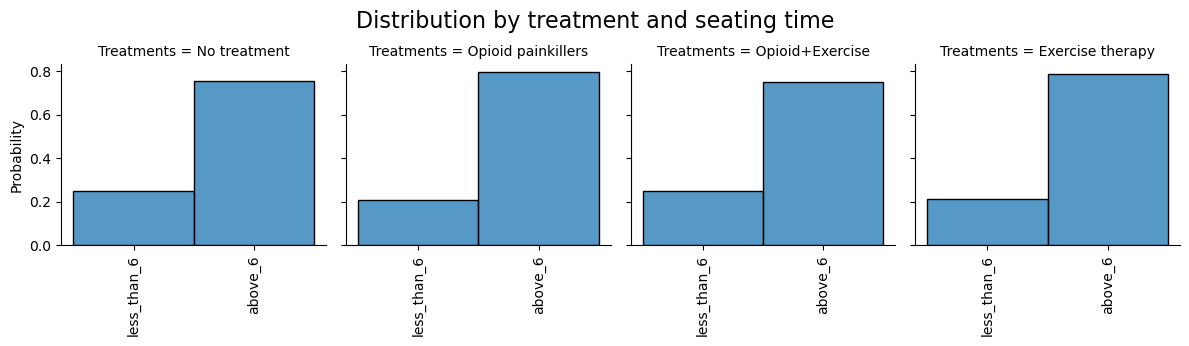

In [342]:
g = sns.FacetGrid(filtered, col='Treatments')
g.map_dataframe(sns.histplot, x='Sitting_time', multiple="stack", stat='probability')
g.fig.suptitle('Distribution by treatment and seating time', fontsize=16)
plt.subplots_adjust(top=0.8)  
g.set_axis_labels("")
g.set_xticklabels(rotation=90)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


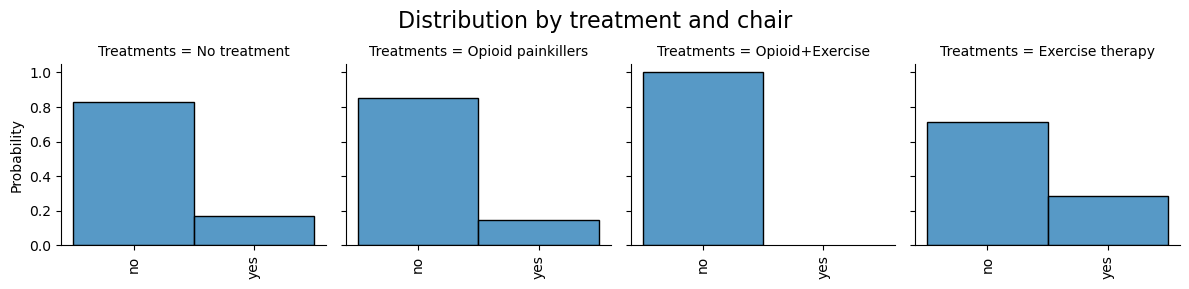

In [343]:
g = sns.FacetGrid(filtered, col='Treatments')
g.map_dataframe(sns.histplot, x='perfect_chair', multiple="stack", stat='probability',)
g.fig.suptitle('Distribution by treatment and chair', fontsize=16)
plt.subplots_adjust(top=0.8)  
g.set_axis_labels("")
g.set_xticklabels(rotation=90)

<font size=5>__we understand that the student with specifi treatment are also 'luck' of life style,most of them are lazy,seat more than 6 hours a day and dont seat on perfect chairs,this can explain why most of them suffer from LBP__

<img src= "https://github.com/royohana31/nn-project-/blob/main/1706810104769.jpg?raw=true" width="400"/>
    

<hr style="border-top: 2px solid black;">


<FONT SIZE=6 color = darkblue>  Main Conclusion 2: Smoking isnt effect LBP among students,chair type,seatingtime and active level gets big impact on the LBP chances

<hr style="border-top: 2px solid black;">


<font size=6,style color = darkblue>__Conclusion number 3:there is a connection between the students year and the chances to suffer from LBP(suprising result)__?
    
   
    
    

<img src= "https://github.com/royohana31/nn-project-/blob/main/pexels-pixabay-267885-1598782961.jpg?raw=true" width="400"/>

<Axes: >

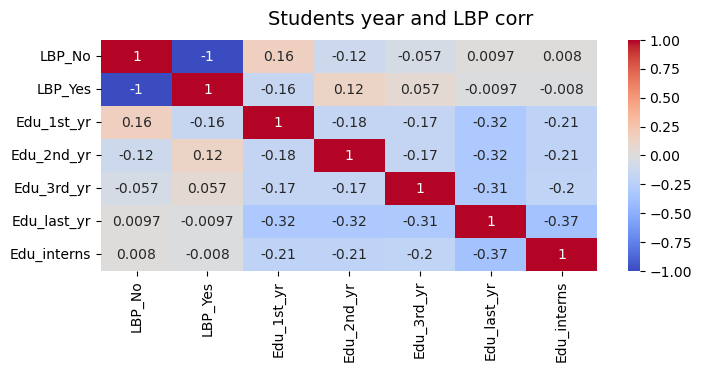

In [348]:
newdummi3=pd.get_dummies(spine_df,columns=['Educational_level',"LBP_12months"])
newdummi3.columns
interest2=['LBP_12months_No','LBP_12months_Yes','Educational_level_1st year', 'Educational_level_2nd year',
       'Educational_level_3rd year','Educational_level_last_year','Educational_level_interns']
matrix3=newdummi3[interest2].corr()
fig, ax = plt.subplots(figsize=(8, 3))
fig.suptitle('Students year and LBP corr', fontsize=14)
short_labels = ['LBP_No', 'LBP_Yes', 'Edu_1st_yr', 'Edu_2nd_yr', 'Edu_3rd_yr', 'Edu_last_yr', 'Edu_interns']
sns.heatmap(matrix3, cmap='coolwarm', center=0, annot=True, xticklabels=short_labels, yticklabels=short_labels)


In [350]:
styear1=spine_df[spine_df["Educational_level"]=="1st year"].groupby("Educational_level")["LBP_12months"].value_counts().reset_index()
styear2=spine_df[spine_df["Educational_level"]=="2nd year"].groupby("Educational_level")["LBP_12months"].value_counts().reset_index()
styear3=spine_df[spine_df["Educational_level"]=="3rd year"].groupby("Educational_level")["LBP_12months"].value_counts().reset_index()
styearfinal=spine_df[spine_df["Educational_level"]=="last_year"].groupby("Educational_level")["LBP_12months"].value_counts().reset_index()
styearinterns=spine_df[spine_df["Educational_level"]=="interns"].groupby("Educational_level")["LBP_12months"].value_counts().reset_index()



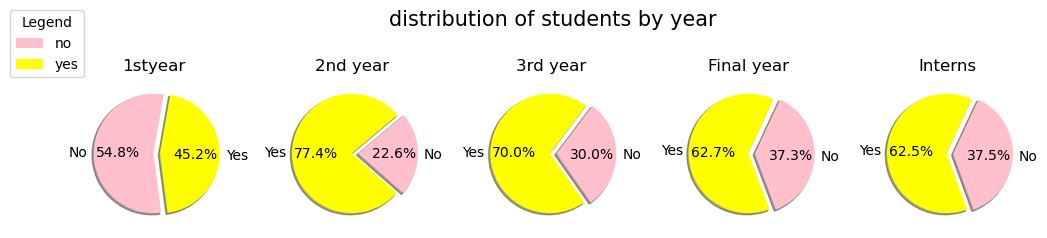

In [351]:
fig, ax = plt.subplots(1,5,figsize=(10, 3))
ax[0].pie(styear1["count"], labels=styear1["LBP_12months"].values, autopct='%1.1f%%',shadow = True, explode = (0.01, 0.1),colors = ['pink', 'yellow'],startangle=80) 
ax[0].set_title("1styear")
ax[1].pie(styear2["count"], labels=styear2["LBP_12months"].values, autopct='%1.1f%%',shadow = True, explode = (0.01, 0.1),colors = ['yellow', 'pink'],startangle=40)  
ax[1].set_title("2nd year")
ax[2].pie(styear3["count"], labels=styear3["LBP_12months"].values, autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1),colors = ['yellow', 'pink'],startangle=53) 
ax[2].set_title("3rd year")
ax[3].pie(styearfinal["count"], labels=styearfinal["LBP_12months"].values, autopct='%1.1f%%',shadow = True, explode = (0.01, 0.1),colors = ['yellow', 'pink'],startangle=65)
ax[3].set_title("Final year")
ax[4].pie(styearinterns["count"], labels=styearfinal["LBP_12months"].values, autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1),colors = ['yellow', 'pink'],startangle=65)
ax[4].set_title("Interns")
fig.subplots_adjust(top=2)
plt.tight_layout()
fig.suptitle('distribution of students by year' , fontsize=15)
legend_labels=["no",'yes']
fig.legend(legend_labels, loc='upper left', title='Legend',bbox_to_anchor=(-0.05, 1))





<hr style="border-top: 2px solid black;">


<font size=3>__we can see that the first year students are less likely to suffer,lets check it by 5 categories that we have founded affectable:"Perfect chair,seatingtime,active_level,gender and BMI group__.

<hr style="border-top: 2px solid black;">


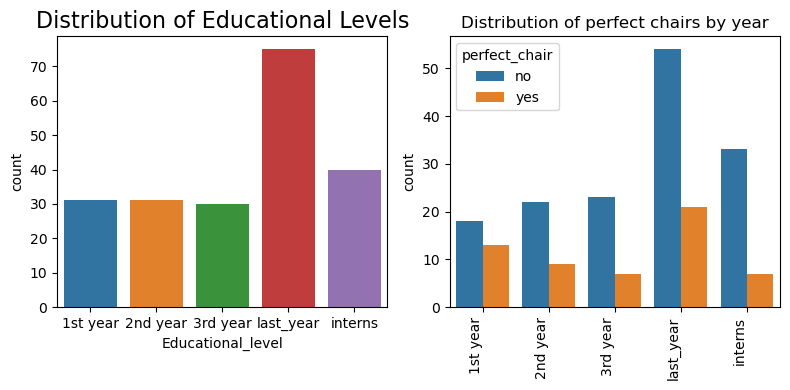

In [45]:
order1 = ["1st year", "2nd year", "3rd year", "last_year", "interns"]
spine_df['Educational_level'] = pd.Categorical(spine_df['Educational_level'], categories=order1)
fig, ax = plt.subplots(1,2,figsize=(8, 4))
sns.countplot(data=spine_df,x='Educational_level',hue='perfect_chair',ax=ax[1])
ax[1].set_title("Distribution of perfect chairs by year")
order1 = ["1st year", "2nd year", "3rd year", "last_year", "interns"]
ax[0].set_title('Distribution of Educational Levels', fontsize=16,)
sns.countplot(data=spine_df,x='Educational_level',order=order1,ax=ax[0])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
ax[1].set_xlabel('')

plt.tight_layout()





<hr style="border-top: 2px solid black;">


<font size=3 color = green> __sub-conclusion1:1st year students seats by counting more on 'perfect chiars' alothough their counting is lower than the 'interns' group, the 'last_year' students by counting gets more perfects chairs but their numbers are are double times the numbers of '1st year'__



<hr style="border-top: 2px solid black;">


Text(0.5, 1.0, 'Counts of active-level among the students ')

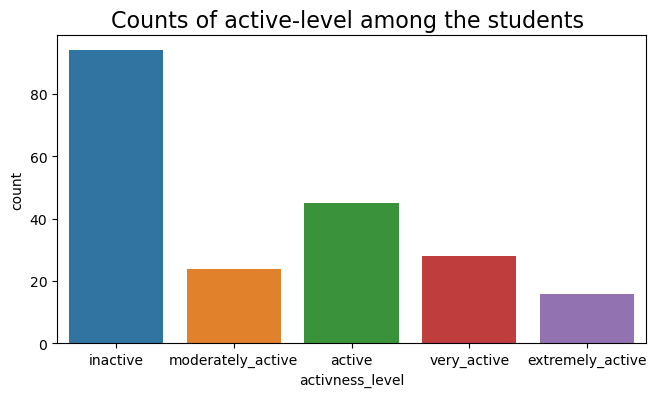

In [252]:
plt.figure(figsize=(7.6, 4))
sns.countplot(data=spine_df,x='activness_level')
plt.title('Counts of active-level among the students ', fontsize=16)


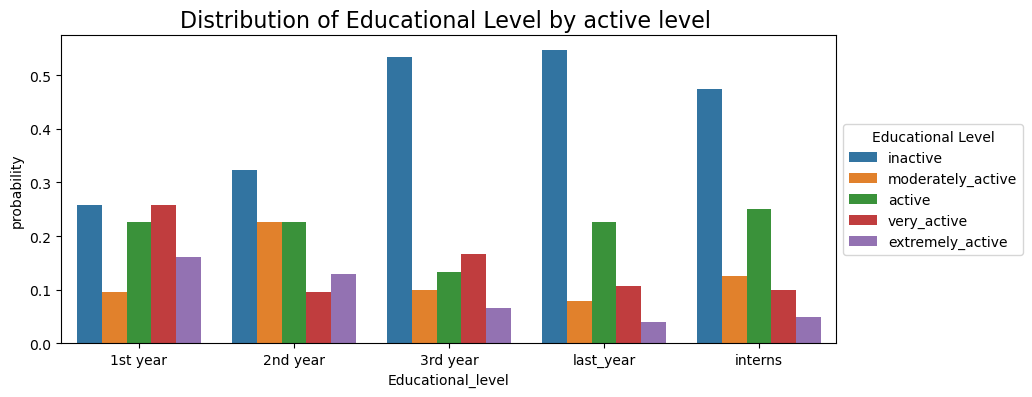

In [47]:
filtered=spine_df.groupby('Educational_level')['activness_level'].value_counts().reset_index()
educational_level_counts = spine_df['Educational_level'].value_counts()
filtered = filtered.merge(educational_level_counts.rename('total_count'), on='Educational_level')
filtered['count']=filtered['count']/filtered['total_count']
filtered
plt.figure(figsize=(10, 4))
sns.barplot(data=filtered,x='Educational_level',y='count',hue='activness_level')
plt.ylabel('probability') 
plt.title('Distribution of Educational Level by active level ', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Educational Level')


<Axes: xlabel='Educational_level', ylabel='count'>

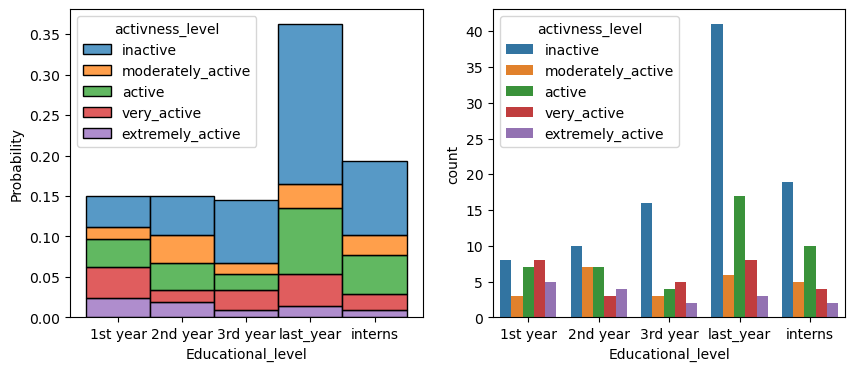

In [267]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data=spine_df,x='Educational_level',hue='activness_level',stat="probability",multiple='stack',ax=ax[0])
sns.countplot(data=spine_df,x='Educational_level',hue='activness_level')

<hr style="border-top: 2px solid black;">


<font size=3 color = green> __sub-conclusion2: 1styear students are more active than others groups__



<hr style="border-top: 2px solid black;">


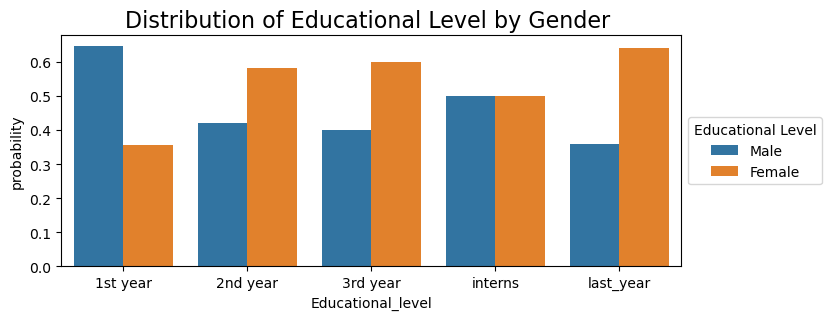

In [353]:
filtered=spine_df.groupby('Educational_level')['Gender'].value_counts().reset_index()
educational_level_counts = spine_df['Educational_level'].value_counts()
filtered = filtered.merge(educational_level_counts.rename('total_count'), on='Educational_level')
filtered['count']=filtered['count']/filtered['total_count']
filtered
plt.figure(figsize=(8, 3))
sns.barplot(data=filtered,x='Educational_level',y='count',hue='Gender')
plt.ylabel('probability') 
plt.title('Distribution of Educational Level by Gender ', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Educational Level')


<hr style="border-top: 2px solid black;">


<font size=3 color = green> __sub-conclusion3: we know that males suffer less from LBP, most of 1styear are males__



<hr style="border-top: 2px solid black;">


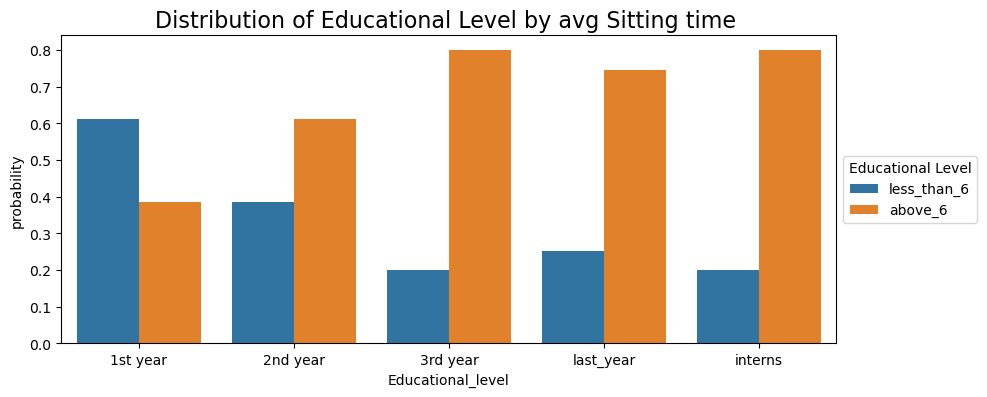

In [260]:
filtered=spine_df.groupby('Educational_level')['Sitting_time'].value_counts().reset_index()
educational_level_counts = spine_df['Educational_level'].value_counts()
filtered = filtered.merge(educational_level_counts.rename('total_count'), on='Educational_level')
filtered['count']=filtered['count']/filtered['total_count']
filtered
plt.figure(figsize=(10, 4))
sns.barplot(data=filtered,x='Educational_level',y='count',hue='Sitting_time')
plt.ylabel('probability') 
plt.title('Distribution of Educational Level by avg Sitting time ', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Educational Level')


<hr style="border-top: 2px solid black;">


<font size=3 color = green> __sub-conclusion4:most of the 1st year students seats below 6 hours a day__



<hr style="border-top: 2px solid black;">


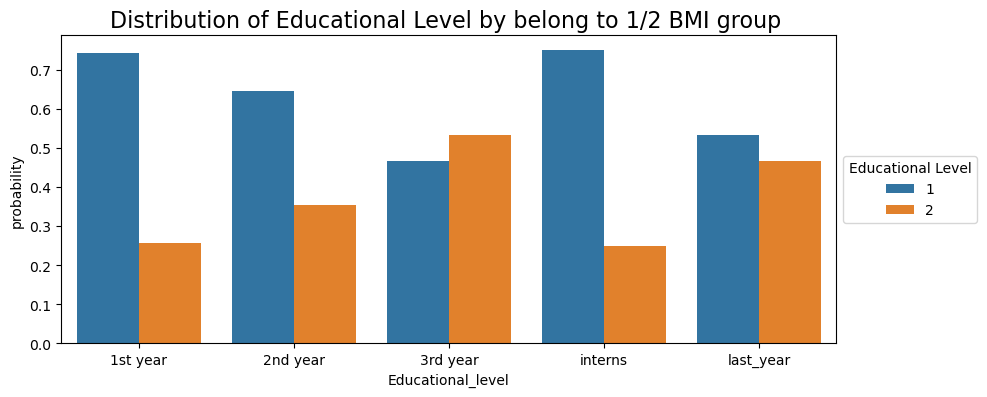

In [354]:
filtered=spine_df.groupby('Educational_level')['BMI_Range'].value_counts().reset_index()
educational_level_counts = spine_df['Educational_level'].value_counts()
filtered = filtered.merge(educational_level_counts.rename('total_count'), on='Educational_level')
filtered['count']=filtered['count']/filtered['total_count']
filtered
plt.figure(figsize=(10, 4))
sns.barplot(data=filtered,x='Educational_level',y='count',hue='BMI_Range')
plt.ylabel('probability') 
plt.title('Distribution of Educational Level by belong to 1/2 BMI group ', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Educational Level')


<hr style="border-top: 2px solid black;">


<font size=3 color = green> __sub-conclusion5:most of the 1 styear students belong to the BMI group__

`

<hr style="border-top: 2px solid black;">


<font size=5 color = brown> __"The best" scala__


<img src= "https://github.com/royohana31/nn-project-/blob/8f3dc98de40debdcb861146e854960151c87a935/adobestock_41789252.jpeg?raw=true" width="400"/>

In [356]:
best=spine_df[(spine_df["BMI_Range"]=="1")&(spine_df['Gender']=='Male')&(spine_df['activness_level']=='extremely_active')&(spine_df['Sitting_time']=="less_than_6")&(spine_df["perfect_chair"]=="yes")]


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

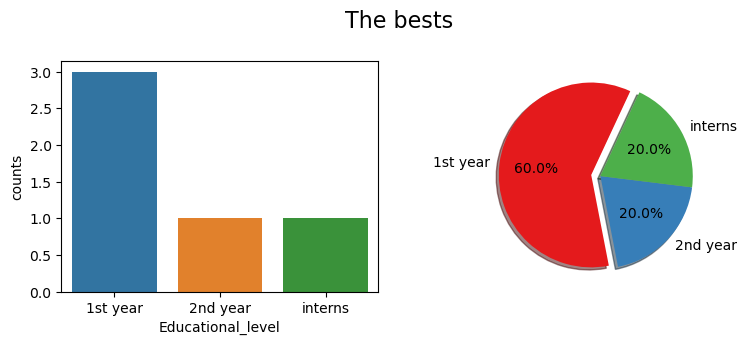

In [357]:
best=spine_df[(spine_df["BMI_Range"]=="1")&(spine_df['Gender']=='Male')&(spine_df['activness_level']=='extremely_active')&(spine_df['Sitting_time']=="less_than_6")&(spine_df["perfect_chair"]=="yes")]
counts = best.groupby('Educational_level')['LBP_12months'].value_counts().reset_index(name='counts')
educational_level_counts = spine_df['Educational_level'].value_counts()
counts = counts.merge(educational_level_counts.rename('total_count'), on='Educational_level')
counts['countsbypercent']=counts['counts']/counts['total_count']
counts
counts2=counts
counts2=counts2[counts2['counts']>0]
counts2

fig, ax = plt.subplots(1,2,figsize=(9, 3))
sns.barplot(data=counts,x='Educational_level',y='counts',ax=ax[0])
pie_colors = sns.color_palette("Set1", len(counts['Educational_level'].unique()))
explode = [0.1 if i == 0 else 0 for i in range(len(counts2))]

ax[1].pie(counts2["counts"], labels=counts2['Educational_level'], autopct='%1.1f%%',explode=explode ,shadow=True, colors=pie_colors, startangle=65)
fig.suptitle('The bests', fontsize=16, y=1.05) 
plt.tight_layout

<hr style="border-top: 2px solid black;">


<font size=5,font color=darkblue>__main conclusion number 3: we saw that the students of the first year are the "leaders" of the main catagoriries for decreasing LBP,thats can expalin why relatively they suffer less from LBP__

<hr style="border-top: 2px solid black;">


<font size=5,font color=darkred>__thanks for listening!!!__